# Iteration

Neu: Manchmal weiß man vorab *nicht*, wie viele Wiederholungen man braucht, um ein Problem zu lösen

#### Bsp.: `collatz()` Conjecture / Vermutung

Gedankenspiel:
- denkt an irgendeine nicht-negative ganze Zahl `n`
- wenn die Zahl gerade ist, ist das neue `n` die Hälfte des alten
- wenn die Zahl ungerade ist, gilt: `n = 3 * n + 1`
- Wiederhole die Schritte so lange, bis `1` rauskommt
- Frage: Kommt immer am Ende die `1` raus?

Bsp: 42 -> 21 -> 64 -> 32 -> 16 -> 8 -> 4 -> 2 -> 1

In [2]:
import time

In [13]:
def collatz(n):

    while n != 1:
        print(n, end="  ")
        time.sleep(0.25)

        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1

    print(n)  # 1

In [14]:
collatz(42)

42  21  64  32  16  8  4  2  1


In [15]:
collatz(10)

10  5  16  8  4  2  1


In [16]:
collatz(100)

100  50  25  76  38  19  58  29  88  44  22  11  34  17  52  26  13  40  20  10  5  16  8  4  2  1


In [17]:
collatz(1_000)

1000  500  250  125  376  188  94  47  142  71  214  107  322  161  484  242  121  364  182  91  274  137  412  206  103  310  155  466  233  700  350  175  526  263  790  395  1186  593  1780  890  445  1336  668  334  167  502  251  754  377  1132  566  283  850  425  1276  638  319  958  479  1438  719  2158  1079  3238  1619  4858  2429  7288  3644  1822  911  2734  1367  4102  2051  6154  3077  9232  4616  2308  1154  577  1732  866  433  1300  650  325  976  488  244  122  61  184  92  46  23  70  35  106  53  160  80  40  20  10  5  16  8  4  2  1


In [18]:
collatz(10_000)

10000  5000  2500  1250  625  1876  938  469  1408  704  352  176  88  44  22  11  34  17  52  26  13  40  20  10  5  16  8  4  2  1


In [19]:
import matplotlib.pyplot as plt

In [20]:
def collatz_plot(n):

    i = 0

    xs = []
    ys = []

    while n != 1:
        ys.append(n)
    
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1

        i += 1
        xs.append(i)

    plt.plot(xs, ys)

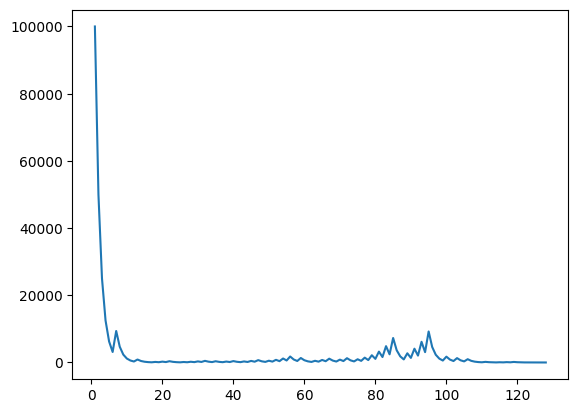

In [29]:
collatz_plot(100_000)

# Simulationen / Indefinite Loops / Unbestimmte Loops

- Ein Modell der Realität (z.B. Flugsimulation)
- wiederholtes Experiment mit Zufallselement
- es folgt immer denselben Regeln
- viele ähnliche aber andere Ergebnisse -> Statistik / Entscheidungstheorie

## "Ratespiele": Münzwurf

Spiel bis zum bitteren Ende:
1. Computer wirft eine Münze
2. Mensch muss raten
3. Wenn richtig -> Spiel zu Ende
4. Wenn falsch -> nächste Runde

In [31]:
import random

In [53]:
random.random()

0.3451134720561331

In [64]:
random.randint(1, 6)  # Würfel

5

In [76]:
random.choice(["Kopf", "Zahl"])

'Zahl'

In [85]:
random.choice(["Kopf", "Kopf", "Zahl"])

'Zahl'

In [90]:
input("Gib eine Zahl ein:")  # input() gibt immer einen str zurück

Gib eine Zahl ein: 42


'42'

### Version 1

Probleme:
- Groß/Kleinschreibung und alt. Schreibweisen sind nicht möglich
- nicht sinnvolle Eingaben werden wie "Kopf" oder "Zahl" behandelt, keine extra Fehlermeldung
- schönere Ausgabe, alte Ausgabe überschreiben
- "Der Code macht zu vieles auf einmal!"
    - Münzwurf/Simulation
    - Nutztereingabe
    - Logik des Spiels / Anwendungslogik / Application Logic / Business Logic
- "Der Code spricht nicht für sich selbst" -> viele Kommentare

In [96]:
# Spiel bis zum bitteren Ende:
spiel_läuft_noch = True

while spiel_läuft_noch:

    # 1. Computer wirft eine Münze
    seite_oben = random.choice(["Kopf", "Zahl"])

    # 2. Mensch muss raten
    geraten = input("Bitten raten! Kopf oder Zahl?") 

    # 3. Wenn richtig -> Spiel zu Ende
    if seite_oben == geraten:
        print("Juhu, du hast gewonnen! Es war", seite_oben)
        spiel_läuft_noch = False

    # 4. Wenn falsch -> nächste Runde
    else:
        print("Oops, du hast verloren! Es war", seite_oben)

Bitten raten! Kopf oder Zahl? kopf


Oops, du hast verloren! Es war Kopf


Bitten raten! Kopf oder Zahl? Kopf 


Oops, du hast verloren! Es war Kopf


Bitten raten! Kopf oder Zahl? Kopf 


Oops, du hast verloren! Es war Zahl


Bitten raten! Kopf oder Zahl? Kopf 


Oops, du hast verloren! Es war Kopf


Bitten raten! Kopf oder Zahl? Kopf


Juhu, du hast gewonnen! Es war Kopf


### Version 2

In [184]:
random.random() < 1

True

In [216]:
def werfe_muenze(*, p_kopf=0.5):
    """Simuliere einen Münzwurf.

    Args:
        p_kopf (float): Wahrscheinlichkeit, dass "kopf" gewinnt;
            muss zwischen 0 und 1 liegen

    Returns:
        seite_oben (str): "kopf" oder "zahl"
    """
    if random.random() < p_kopf:
        return "kopf"
    return "zahl"

In [217]:
help(werfe_muenze)

Help on function werfe_muenze in module __main__:

werfe_muenze(*, p_kopf=0.5)
    Simuliere einen Münzwurf.

    Args:
        p_kopf (float): Wahrscheinlichkeit, dass "kopf" gewinnt;
            muss zwischen 0 und 1 liegen

    Returns:
        seite_oben (str): "kopf" oder "zahl"



In [218]:
werfe_muenze()

'kopf'

In [219]:
werfe_muenze(p_kopf=1)

'kopf'

In [224]:
" KOpf  ".lower()

' kopf  '

In [225]:
" KOpf  ".strip()  # entfernt Whitespace rechts und links

'KOpf'

In [226]:
(" KOpf  ".strip()).lower()

'kopf'

In [227]:
" KOpf  ".strip().lower()  # Method Chaining (von links nach rechts)

'kopf'

In [247]:
"heads" in ["kopf", "heads", "head", "k", "h"]  # Membership Testing

True

In [251]:
def mensch_muss_raten(*, prompt="Kopf oder Zahl?"):
    """Verarbeite die Eingabe des Menschen.

    Args:
        prompt (str): Nachricht, die dem Spieler angezeigt wird

    Returns:
        seite_oben (str / None): "kopf" oder "zahl",
            wenn die Eingabe verständlich ist;
            ansonsten `None`
    """
    geraten = input(prompt)

    # Einfache Schreibfehler handeln
    geraten = geraten.strip().lower()

    if geraten in ["kopf", "heads", "head", "k", "h"]:
        return "kopf"
    elif geraten in ["zahl", "tails", "tail", "z", "t", "number"]:
        return "zahl"

    return None

In [252]:
mensch_muss_raten()

Kopf oder Zahl? kopf


'kopf'

In [254]:
mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")

Bitten raten! Kopf oder Zahl? kopf


'kopf'

In [255]:
spiel_läuft_noch = True

while spiel_läuft_noch:

    seite_oben = werfe_muenze(p_kopf=0.5)
    geraten = mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")

    # 3. Wenn richtig -> Spiel zu Ende
    if seite_oben == geraten:
        print("Juhu, du hast gewonnen! Es war", seite_oben.title())
        spiel_läuft_noch = False

    # 4. Wenn falsch -> nächste Runde
    else:
        print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? k


Juhu, du hast gewonnen! Es war kopf


### Version 3

Python's **Syntactic Sugar** (eingebaute "Vereinfachungen") benutzen

In [256]:
while True:

    seite_oben = werfe_muenze(p_kopf=0.5)
    geraten = mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")

    if seite_oben == geraten:
        print("Juhu, du hast gewonnen! Es war", seite_oben.title())
        # Den while-Loop beenden
        break

    else:
        print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? k


Juhu, du hast gewonnen! Es war kopf


### Version 4

Die Logik hinterfragen -> Fehlermeldung, wenn der Spieler weder Kopf noch Zahl eingibt

In [258]:
while True:

    seite_oben = werfe_muenze(p_kopf=0.5)  # -> "kopf" oder "zahl"
    geraten = mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")  # -> "kopf", "zahl", oder None

    if geraten == None:
        print("Bitte etwas Sinnvolles eingeben!!!")
    else:

        if seite_oben == geraten:
            print("Juhu, du hast gewonnen! Es war", seite_oben.title())
            break
    
        else:
            print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? alsfjdajf;l


Bitte etwas Sinnvolles eingeben!!!


Bitten raten! Kopf oder Zahl? kopf


Juhu, du hast gewonnen! Es war kopf


### Version 5

Unnötige Prozessorarbeit vermeiden

In [259]:
while True:

    geraten = mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")  # -> "kopf", "zahl", oder None

    if geraten == None:
        print("Bitte etwas Sinnvolles eingeben!!!")
    else:

        seite_oben = werfe_muenze(p_kopf=0.5)  # -> "kopf" oder "zahl"

        if seite_oben == geraten:
            print("Juhu, du hast gewonnen! Es war", seite_oben.title())
            break
    
        else:
            print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? k


Oops, du hast verloren! Es war zahl


Bitten raten! Kopf oder Zahl? k


Oops, du hast verloren! Es war zahl


Bitten raten! Kopf oder Zahl? lzfjd;lasjf


Bitte etwas Sinnvolles eingeben!!!


Bitten raten! Kopf oder Zahl? k


Juhu, du hast gewonnen! Es war kopf


### Version 6

Python's **Syntactic Sugar** (eingebaute "Vereinfachungen") benutzen

In [260]:
while True:

    geraten = mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")  # -> "kopf", "zahl", oder None

    if geraten == None:
        print("Bitte etwas Sinnvolles eingeben!!!")
        # Gehe direkt wieder nach oben
        continue

    # geraten -> "kopf" oder "zahl"
    seite_oben = werfe_muenze(p_kopf=0.5)  # -> "kopf" oder "zahl"

    if seite_oben == geraten:
        print("Juhu, du hast gewonnen! Es war", seite_oben.title())
        break

    print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? aslfja


Bitte etwas Sinnvolles eingeben!!!


Bitten raten! Kopf oder Zahl? alfj


Bitte etwas Sinnvolles eingeben!!!


Bitten raten! Kopf oder Zahl? kopf


Oops, du hast verloren! Es war zahl


Bitten raten! Kopf oder Zahl? kopf


Juhu, du hast gewonnen! Es war kopf


### Version 7

Ohne Kommentare

In [262]:
while True:

    geraten = mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")

    if geraten == None:
        print("Bitte etwas Sinnvolles eingeben!!!")
        continue

    seite_oben = werfe_muenze(p_kopf=0.5)

    if seite_oben == geraten:
        print("Juhu, du hast gewonnen! Es war", seite_oben.title())
        break

    print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? k


Oops, du hast verloren! Es war Zahl


Bitten raten! Kopf oder Zahl? k


Juhu, du hast gewonnen! Es war Kopf


### (Version 8)

In [263]:
while True:

    if (geraten := mensch_muss_raten(prompt="Bitten raten! Kopf oder Zahl?")) == None:
        print("Bitte etwas Sinnvolles eingeben!!!")
        continue

    if (seite_oben := werfe_muenze(p_kopf=0.5)) == geraten:
        print("Juhu, du hast gewonnen! Es war", seite_oben.title())
        break

    print("Oops, du hast verloren! Es war", seite_oben.title())

Bitten raten! Kopf oder Zahl? k


Juhu, du hast gewonnen! Es war Kopf
